In [127]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel(r'C:\Users\sw.shin\Desktop\sw.shin\06_코딩\연습용 자료들\02_TIGER200(2014.1~2019.11).xlsx', sheet_name='Sheet1', index_col=0)

In [128]:
df['daily return']=df.pct_change()

In [129]:
df

,TIGER 200,daily return
D A T E,,
2013-12-30,26670.0,NaN
2014-01-02,25975.0,-0.026059
2014-01-03,25705.0,-0.010395
2014-01-06,25760.0,0.002140
2014-01-07,25855.0,0.003688
...,...,...
2019-12-03,27665.0,-0.005214
2019-12-04,27490.0,-0.006326
2019-12-05,27420.0,-0.002546


In [130]:
df.index

DatetimeIndex(['2013-12-30', '2014-01-02', '2014-01-03', '2014-01-06',
               '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
               '2014-01-13', '2014-01-14',
               ...
               '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-09'],
              dtype='datetime64[ns]', name='D A T E', length=1459, freq=None)

In [131]:
# 전략 : 매년 11월 초에 산다. 매년 5월 초에 판다.
buy_month=[11]
buy_year=[]
buy_day=[]
sell_month=[5]
sell_year=[]
sell_day=[]
for i in df.index:
    if i.month in buy_month:
        if i.year not in buy_year:
            buy_day.append(i)
            buy_year.append(i.year)
for j in df.index:
    if j.month in sell_month:
        if j.year not in sell_year:
            sell_day.append(j)
            sell_year.append(j.year)

In [132]:
buy_day

[Timestamp('2014-11-03 00:00:00'),
 Timestamp('2015-11-02 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00')]

In [133]:
sell_day

[Timestamp('2014-05-02 00:00:00'),
 Timestamp('2015-05-04 00:00:00'),
 Timestamp('2016-05-02 00:00:00'),
 Timestamp('2017-05-02 00:00:00'),
 Timestamp('2018-05-02 00:00:00'),
 Timestamp('2019-05-02 00:00:00')]

In [134]:
# 보유/미보유 여부 입력하기
df['보유']=False
for day in df.index:
    if buy_day[0]<=day<sell_day[1]:
        df.at[day, '보유']=True
    elif buy_day[1]<=day<sell_day[2]:
        df.at[day, '보유']=True
    elif buy_day[2]<=day<sell_day[3]:
        df.at[day, '보유']=True
    elif buy_day[3]<=day<sell_day[4]:
        df.at[day, '보유']=True
    elif buy_day[4]<=day<sell_day[5]:
        df.at[day, '보유']=True
df    

,TIGER 200,daily return,보유
D A T E,,,
2013-12-30,26670.0,NaN,False
2014-01-02,25975.0,-0.026059,False
2014-01-03,25705.0,-0.010395,False
2014-01-06,25760.0,0.002140,False
2014-01-07,25855.0,0.003688,False
...,...,...,...
2019-12-03,27665.0,-0.005214,False
2019-12-04,27490.0,-0.006326,False
2019-12-05,27420.0,-0.002546,False


In [137]:
# 초기 자본금 백만원
df['buy11,sell5']=1000000
df['buy5,sell11']=1000000
df

,TIGER 200,daily return,보유,"buy11,sell5","buy5,sell11"
D A T E,,,,,
2013-12-30,26670.0,NaN,False,1000000,1000000
2014-01-02,25975.0,-0.026059,False,1000000,1000000
2014-01-03,25705.0,-0.010395,False,1000000,1000000
2014-01-06,25760.0,0.002140,False,1000000,1000000
2014-01-07,25855.0,0.003688,False,1000000,1000000
...,...,...,...,...,...
2019-12-03,27665.0,-0.005214,False,1000000,1000000
2019-12-04,27490.0,-0.006326,False,1000000,1000000
2019-12-05,27420.0,-0.002546,False,1000000,1000000


In [139]:
# buy11,sell5포트폴리오 운영
for i in range(len(df.index)-1):
    if df.at[df.index[i],'보유']==True:
        df.at[df.index[i+1], 'buy11,sell5']=df.at[df.index[i],'buy11,sell5']*(1+df.at[df.index[i], 'daily return'])
    else:
        df.at[df.index[i+1],'buy11,sell5']=df.at[df.index[i],'buy11,sell5']
        

               
df

,TIGER 200,daily return,보유,"buy11,sell5","buy5,sell11"
D A T E,,,,,
2013-12-30,26670.0,NaN,False,1000000,1000000
2014-01-02,25975.0,-0.026059,False,1000000,1000000
2014-01-03,25705.0,-0.010395,False,1000000,1000000
2014-01-06,25760.0,0.002140,False,1000000,1000000
2014-01-07,25855.0,0.003688,False,1000000,1000000
...,...,...,...,...,...
2019-12-03,27665.0,-0.005214,False,1224288,1000000
2019-12-04,27490.0,-0.006326,False,1224288,1000000
2019-12-05,27420.0,-0.002546,False,1224288,1000000


In [140]:
for i in range(1,len(df.index)-1):
    if df.at[df.index[i],'보유']==False:
        df.at[df.index[i+1], 'buy5,sell11']=df.at[df.index[i],'buy5,sell11']*(1+df.at[df.index[i], 'daily return'])
    else:
        df.at[df.index[i+1],'buy5,sell11']=df.at[df.index[i],'buy5,sell11']
df

,TIGER 200,daily return,보유,"buy11,sell5","buy5,sell11"
D A T E,,,,,
2013-12-30,26670.0,NaN,False,1000000,1000000
2014-01-02,25975.0,-0.026059,False,1000000,1000000
2014-01-03,25705.0,-0.010395,False,1000000,973940
2014-01-06,25760.0,0.002140,False,1000000,963816
2014-01-07,25855.0,0.003688,False,1000000,965878
...,...,...,...,...,...
2019-12-03,27665.0,-0.005214,False,1224288,851106
2019-12-04,27490.0,-0.006326,False,1224288,846668
2019-12-05,27420.0,-0.002546,False,1224288,841312


In [97]:
i=2
df.at[df.index[i], '보유']

True

In [ ]:
df['bench']

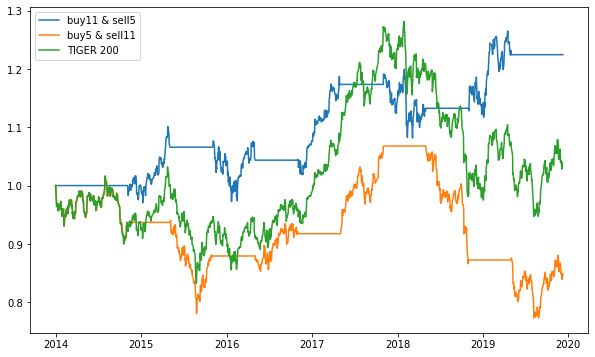

In [142]:
TIGER200=df['TIGER 200']/df['TIGER 200'][0]
buy11_sell5=df['buy11,sell5']/df['buy11,sell5'][0]
buy5_sell11=df['buy5,sell11']/df['buy5,sell11'][0]

plt.figure(figsize=(10,6))
plt.plot(buy11_sell5, label='buy11 & sell5')
plt.plot(buy5_sell11, label='buy5 & sell11')
plt.plot(TIGER200, label='TIGER 200')
plt.legend()

In [100]:
df['Portfolio'][0]

1000000